In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv(r'C:\Users\USER\Desktop\SQL and Excel Files\Excel files\Credit Risk Analysis\Credit_Risk_Dataset.csv')

In [33]:
# Display all columns
pd.set_option("display.max_columns", None)
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153440,0.930628,4,0.228103,0


In [34]:
df.shape

(32581, 29)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_ID                   32581 non-null  object 
 1   person_age                  32581 non-null  int64  
 2   person_income               32581 non-null  int64  
 3   person_home_ownership       32581 non-null  object 
 4   person_emp_length           31686 non-null  float64
 5   loan_intent                 32581 non-null  object 
 6   loan_grade                  32581 non-null  object 
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   loan_status                 32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  cb_person_default_on_file   32581 non-null  object 
 12  cb_person_cred_hist_length  32581 non-null  int64  
 13  gender                      325

In [36]:
df.isnull().sum()

client_ID                        0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
gender                           0
marital_status                   0
education_level                  0
country                          0
state                            0
city                             0
city_latitude                    0
city_longitude                   0
employment_type                  0
loan_term_months                 0
loan_to_income_ratio             0
other_debt                       0
debt_to_income_ratio             0
open_accounts                    0
credit_utilization_ratio         0
past_delinquencies  

We can see from our data that most of our columns do not have any missing values aside from "loan_int_rate" & "person_emp_length". This would be handled later.

In [37]:
# Statistics Summary
numeric_df = df.describe(include=[int, float])
numeric_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,city_latitude,city_longitude,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211,45.407613,-63.805473,38.501581,0.170553,1.156796e+04,0.345208,8.042018,0.499884,0.505141
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001,7.644809,46.615580,16.012441,0.107049,1.306093e+04,0.129406,4.328087,0.259530,0.711745
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,29.760400,-123.365600,12.000000,0.000789,2.252074e+02,0.064502,0.000000,0.050001,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,40.712800,-96.797000,24.000000,0.089655,5.387168e+03,0.251236,4.000000,0.275358,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,46.813900,-75.697200,36.000000,0.148148,8.995071e+03,0.333188,8.000000,0.500289,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,51.507400,-3.943600,60.000000,0.229167,1.456293e+04,0.423142,12.000000,0.725056,1.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,55.953300,-0.127800,60.000000,0.830000,1.187999e+06,1.053888,15.000000,0.949998,6.000000


From our statistical summary, Some data points seems to be an error resulting from data entry. Example, from the column "person_age" we have a maximum age of 144 also from the column "person_emp_length" has a maximum value of 123. This would skew our data during plotting if not dealt with.

In [38]:
# Checking unique records
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: client_ID
['CUST_00001' 'CUST_00002' 'CUST_00003' ... 'CUST_32579' 'CUST_32580'
 'CUST_32581']

Column: person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']

Column: cb_person_default_on_file
['Y' 'N']

Column: gender
['Male' 'Female']

Column: marital_status
['Married' 'Divorced' 'Single' 'Widowed']

Column: education_level
['High School' 'Master' 'Bachelor' 'PhD']

Column: country
['Canada' 'UK' 'USA']

Column: state
['Ontario' 'Wales' 'BC' 'New York' 'California' 'Quebec' 'Texas'
 'Scotland' 'England']

Column: city
['Toronto' 'Swansea' 'Vancouver' 'Buffalo' 'San Francisco' 'Quebec City'
 'Dallas' 'Glasgow' 'London' 'Montreal' 'Victoria' 'Los Angeles'
 'New York City' 'Ottawa' 'Edinburgh' 'Houston' 'Manchester' 'Cardiff']

Column: employment_type
['Self-employed' 'Full-time' 'Part-time' 'Unemployed']


In [39]:
# Checking for unusual ages
df[df["person_age"] >= 100]

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
81,CUST_00082,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3,Male,Married,High School,USA,New York,New York City,40.7128,-74.0060,Full-time,24,0.019200,3.865941e+04,0.173838,4,0.080767,0
183,CUST_00184,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2,Female,Divorced,Bachelor,Canada,BC,Victoria,48.4284,-123.3656,Full-time,36,0.030000,5.487376e+04,0.304369,1,0.053672,0
575,CUST_00576,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3,Female,Single,High School,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,36,0.254987,2.133409e+04,0.521650,13,0.446131,0
747,CUST_00748,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4,Male,Single,High School,USA,New York,Buffalo,42.8864,-78.8784,Full-time,60,0.256410,1.094605e+04,0.396744,7,0.589120,1
32297,CUST_32298,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25,Male,Single,PhD,USA,Texas,Houston,29.7604,-95.3698,Self-employed,24,0.000833,1.187999e+06,0.198833,8,0.850584,0


In [40]:
# Dropping ages above 100
df = df[df["person_age"] < 100]
df.shape

(32576, 29)

In [41]:
# Checking for very high values in person_emp_length(years)
df[df["person_emp_length"] >= 70]

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.45385,0.735635,14,0.495557,0
210,CUST_00211,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4,Male,Single,High School,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.104167,32653.09251,0.274235,6,0.482647,1


In [43]:
# Dropping these 2 rows
df = df[df["person_emp_length"] < 70]
df.shape

(31679, 29)

In [44]:
df.isnull().sum()

client_ID                        0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3047
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
gender                           0
marital_status                   0
education_level                  0
country                          0
state                            0
city                             0
city_latitude                    0
city_longitude                   0
employment_type                  0
loan_term_months                 0
loan_to_income_ratio             0
other_debt                       0
debt_to_income_ratio             0
open_accounts                    0
credit_utilization_ratio         0
past_delinquencies  

In [53]:
# Handling the nan values
df[df['loan_int_rate'].isna()]

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
39,CUST_00040,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4,Male,Married,High School,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,60,0.419580,10969.320420,0.572997,3,0.633212,1
50,CUST_00051,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4,Female,Single,Master,USA,Texas,Houston,29.7604,-95.3698,Full-time,24,0.384615,12106.049040,0.539821,7,0.523438,0
57,CUST_00058,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4,Male,Single,Bachelor,USA,New York,New York City,40.7128,-74.0060,Full-time,36,0.126354,73129.330640,0.390359,4,0.454316,0
59,CUST_00060,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3,Male,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,36,0.145833,2467.213396,0.351434,1,0.647044,1
62,CUST_00063,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4,Female,Single,Bachelor,UK,England,London,51.5074,-0.1278,Full-time,60,0.038023,63598.548710,0.279842,13,0.944370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32547,CUST_32548,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28,Female,Single,Bachelor,Canada,Quebec,Quebec City,46.8139,-71.2080,Full-time,24,0.286416,430.484014,0.374485,1,0.126595,0
32552,CUST_32553,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19,Female,Single,Bachelor,Canada,Ontario,Ottawa,45.4215,-75.6972,Full-time,36,0.217865,2802.904871,0.278930,3,0.890571,0
32553,CUST_32554,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28,Female,Divorced,Bachelor,UK,England,Manchester,53.4808,-2.2426,Part-time,60,0.250000,1790.355554,0.339518,2,0.381129,0
32569,CUST_32570,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23,Male,Married,Master,UK,England,Manchester,53.4808,-2.2426,Full-time,60,0.125000,7177.906050,0.244632,7,0.448637,0


In [55]:
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153440,0.930628,4,0.228103,0
5,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0


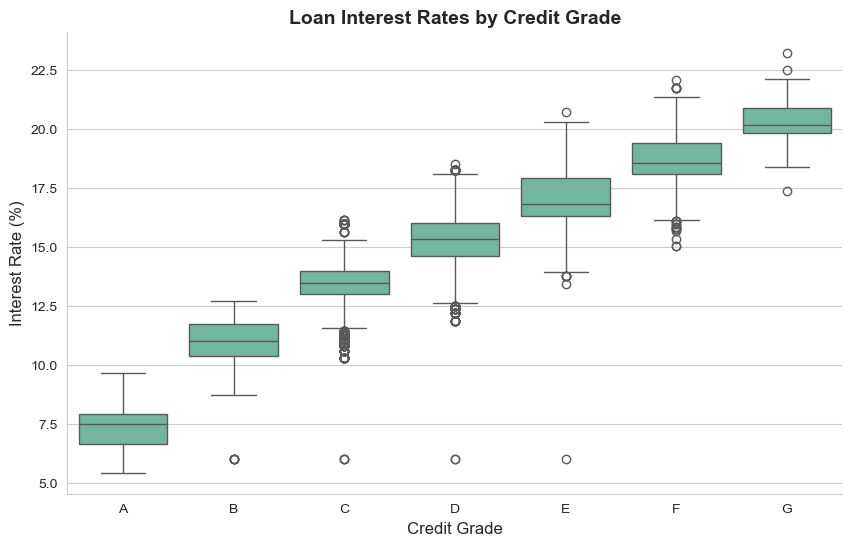

In [58]:
# Checking the relationship between loan grade and loan int rate
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="loan_grade",
    y="loan_int_rate",
    order=sorted(df["loan_grade"].unique())
)

# Add titles and labels
plt.title("Loan Interest Rates by Credit Grade", fontsize=14, weight="bold")
plt.xlabel("Credit Grade", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)

# Clean up the plot
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.show()

From the diagram(Boxplot), grade A has an interest rate of 6-9% while grade G shows an interest rate of 17.5-22.5%. These indicates with a high credit grade = High interest rate. These is how we are going to solve the nan values.
Also to add on, loan amount also will guide us in handling nan values as we have seen from our dataframe, example Loan Amount = 5,500 → Interest Rate ≈ 12.87% & Loan Amount = 35,000 → Interest Rate ≈ 14.27% which fall under Grade C meaning imputing only by grade could miss nuances.

In [59]:
df['loan_amnt'].describe()

count    31679.000000
mean      9659.962436
std       6334.360554
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [60]:
# Define bins based on your summary
bins = [0, 5000, 8000, 12500, 20000, 35000]
labels = ['0-5k', '5k-8k', '8k-12.5k', '12.5k-20k', '20k-35k']

# Create a new binned column
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, include_lowest=True)

In [61]:
# Check distribution of bins
print(df['loan_amnt_bin'].value_counts())

loan_amnt_bin
0-5k         9077
8k-12.5k     7681
5k-8k        7094
12.5k-20k    5714
20k-35k      2113
Name: count, dtype: int64


In [62]:
# Filling nans using both grade & loan amount bin.
df['loan_int_rate'] = df.groupby(['loan_grade', 'loan_amnt_bin'])['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\USER\AppData\Local\Temp\ipykernel_4552\2403580460.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['loan_int_rate'] = df.groupby(['loan_grade', 'loan_amnt_bin'])['loan_int_rate'].transform(


In [63]:
df.isnull().sum()

client_ID                     0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
gender                        0
marital_status                0
education_level               0
country                       0
state                         0
city                          0
city_latitude                 0
city_longitude                0
employment_type               0
loan_term_months              0
loan_to_income_ratio          0
other_debt                    0
debt_to_income_ratio          0
open_accounts                 0
credit_utilization_ratio      0
past_delinquencies            0
loan_amnt_bin                 0
dtype: int64

In [64]:
# Save to CSV
df.to_csv("Credit_Risk_Data.csv", index=False)

print("File saved successfully as Credit_Risk_Data.csv")

File saved successfully as Credit_Risk_Data.csv
